   Problemstellung:
Ziel ist es, ein Machine-Learning-Modell zu entwickeln, das vorhersagen kann, welche Kunden das Unternehmen verlassen werden (Churn Prediction).

Vor der Modellierung sollen die notwendigen Schritte zur Datenanalyse und zum Feature Engineering durchgeführt werden.

Beschreibung des Datensatzes – Telco Kundendaten
Der Datensatz ist ein fiktiver Kundenstamm eines Telekommunikationsunternehmens zur Vorhersage von Kundenabwanderung (Churn).

Er enthält Informationen zu 7043 Kunden aus Kalifornien und umfasst die folgenden Merkmalsgruppen:

* Demografische Merkmale:
Geschlecht, Seniorenstatus, Partnerschaft, Unterhaltspflichtige Personen (z. B. Kinder oder Eltern)

* Dienstleistungsbezogene Merkmale:
Telefonanschluss, Internetdienst, Online-Sicherheitsdienst, Online-Backup, Geräteschutz, Technischer Support, Streaming von Fernsehen und Filmen

* Vertrags- und Rechnungsmerkmale:
Vertragslaufzeit, Zahlung per Papierrechnung oder nicht, Monatliche Kosten, Gesamtkosten

* Zielvariable:
Churn (Hat der Kunde den Vertrag gekündigt? Ja oder Nein)

| **Variable**         | **Beschreibung**                                                                 |
|----------------------|----------------------------------------------------------------------------------|
| **CustomerId**       | Kunden-ID                                                                        |
| **Gender**           | Geschlecht (Female/Male)                                                                     |
| **SeniorCitizen**    | Ist der Kunde ein Senior? (1 = Ja, 0 = Nein)                                     |
| **Partner**          | Hat der Kunde einen Partner? (Ja, Nein)                                          |
| **Dependents**       | Hat der Kunde unterhaltsberechtigte Personen? (z. B. Kinder, Eltern)             |
| **Tenure**           | Anzahl der Monate beim Unternehmen                                               |
| **PhoneService**     | Hat der Kunde einen Telefonanschluss? (Ja, Nein)                                 |
| **MultipleLines**    | Hat der Kunde mehrere Leitungen? (Ja, Nein, Kein Telefondienst)                  |
| **InternetService**  | Art des Internetdienstes (DSL, Glasfaser, Kein)                                  |
| **OnlineSecurity**   | Nutzt der Kunde Online-Sicherheitsdienste? (Ja, Nein, Kein Internetdienst)       |
| **OnlineBackup**     | Nutzt der Kunde Online-Backups? (Ja, Nein, Kein Internetdienst)                  |
| **DeviceProtection** | Nutzt der Kunde Geräteschutzdienste? (Ja, Nein, Kein Internetdienst)             |
| **TechSupport**      | Nutzt der Kunde technischen Support? (Ja, Nein, Kein Internetdienst)             |
| **StreamingTV**      | Streamt der Kunde Fernsehinhalte? (Ja, Nein, Kein Internetdienst)                |
| **StreamingMovies**  | Streamt der Kunde Filme? (Ja, Nein, Kein Internetdienst)                         |
| **Contract**         | Vertragslaufzeit (Monatlich, Ein Jahr, Zwei Jahre)                               |
| **PaperlessBilling** | Papierlose Rechnung? (Ja, Nein)                                                  |
| **PaymentMethod**    | Zahlungsmethode (z. B. elektronischer Scheck, Kreditkarte automatisch etc.)      |
| **MonthlyCharges**   | Monatlich berechneter Betrag                                                     |
| **TotalCharges**     | Gesamter berechneter Betrag                                                      |
| **Churn**            | Kundenabwanderung (Ja = gekündigt, Nein = aktiv)                                 |

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
#!pip install missingno

In [3]:
#!pip install matplotlib-venn

In [4]:
import missingno as msno

In [5]:
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [7]:
def data_load():
    data= pd.read_csv("../Telco_Customer_Datensatz_FeatureEng/TelcoCustomerChurn_HW2.csv")
    return data

In [8]:
tel=data_load()

    # Explorative Datenanalyse (Kesifsel Veri Analizi)

In [9]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [10]:
columns=list(tel.columns)
columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [11]:
tel.duplicated().sum()

0

In [12]:
#tel = tel.drop_duplicates(subset='customerID', keep='first')    wenn es duplicated gibt

In [13]:
tel.shape

(7043, 21)

In [14]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
tel["TotalCharges"] = pd.to_numeric(tel["TotalCharges"], errors='coerce')

In [16]:
tel.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000,7043.000,7043.000,7032.000
mean,0.162,32.371,64.762,2283.300
std,0.369,24.559,30.090,2266.771
min,0.000,0.000,18.250,18.800
25%,0.000,9.000,35.500,401.450
50%,0.000,29.000,70.350,1397.475
75%,0.000,55.000,89.850,3794.738
max,1.000,72.000,118.750,8684.800


In [17]:
cat_cols = [col for col in tel.columns 
            if (tel[col].dtype == "O" or tel[col].nunique() < 10) 
            and col != "customerID"]

num_cols = [col for col in tel.columns if tel[col].dtype != "O" and tel[col].nunique() >= 10]

print(f" Kategorische Variable: {cat_cols}")
print(f" Numerische Variable: {num_cols}")

 Kategorische Variable: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
 Numerische Variable: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [18]:
for col in cat_cols:
    freq_table = pd.DataFrame({
        'Frequenz': tel[col].value_counts(),
        'Ratio (%)': tel[col].value_counts(normalize=True) * 100})
    #print(freq_table)
    display(freq_table)



,Frequenz,Ratio (%)
gender,,
Male,3555,50.476
Female,3488,49.524


,Frequenz,Ratio (%)
SeniorCitizen,,
0,5901,83.785
1,1142,16.215


,Frequenz,Ratio (%)
Partner,,
No,3641,51.697
Yes,3402,48.303


,Frequenz,Ratio (%)
Dependents,,
No,4933,70.041
Yes,2110,29.959


,Frequenz,Ratio (%)
PhoneService,,
Yes,6361,90.317
No,682,9.683


,Frequenz,Ratio (%)
MultipleLines,,
No,3390,48.133
Yes,2971,42.184
No phone service,682,9.683


,Frequenz,Ratio (%)
InternetService,,
Fiber optic,3096,43.959
DSL,2421,34.375
No,1526,21.667


,Frequenz,Ratio (%)
OnlineSecurity,,
No,3498,49.666
Yes,2019,28.667
No internet service,1526,21.667


,Frequenz,Ratio (%)
OnlineBackup,,
No,3088,43.845
Yes,2429,34.488
No internet service,1526,21.667


,Frequenz,Ratio (%)
DeviceProtection,,
No,3095,43.944
Yes,2422,34.389
No internet service,1526,21.667


,Frequenz,Ratio (%)
TechSupport,,
No,3473,49.311
Yes,2044,29.022
No internet service,1526,21.667


,Frequenz,Ratio (%)
StreamingTV,,
No,2810,39.898
Yes,2707,38.435
No internet service,1526,21.667


,Frequenz,Ratio (%)
StreamingMovies,,
No,2785,39.543
Yes,2732,38.790
No internet service,1526,21.667


,Frequenz,Ratio (%)
Contract,,
Month-to-month,3875,55.019
Two year,1695,24.066
One year,1473,20.914


,Frequenz,Ratio (%)
PaperlessBilling,,
Yes,4171,59.222
No,2872,40.778


,Frequenz,Ratio (%)
PaymentMethod,,
Electronic check,2365,33.579
Mailed check,1612,22.888
Bank transfer (automatic),1544,21.922
Credit card (automatic),1522,21.610


,Frequenz,Ratio (%)
Churn,,
No,5174,73.463
Yes,1869,26.537


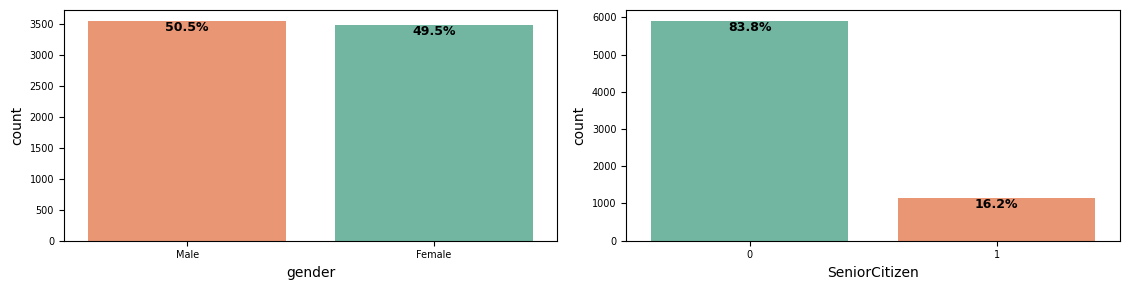

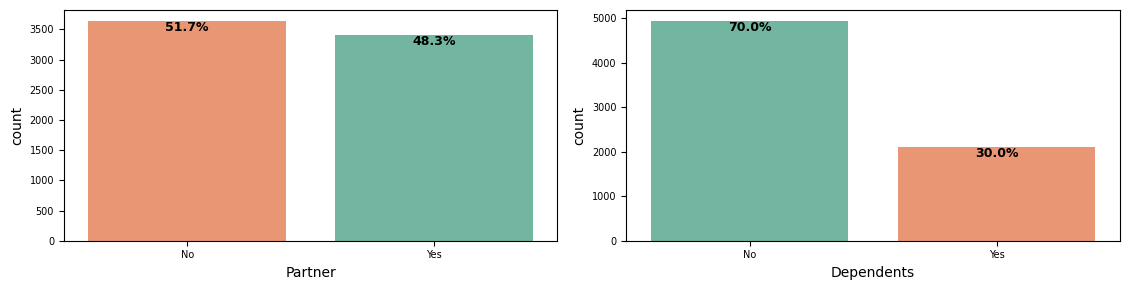

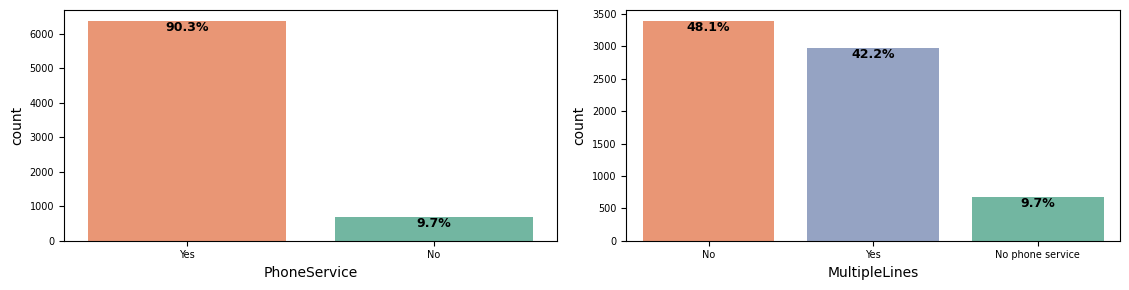

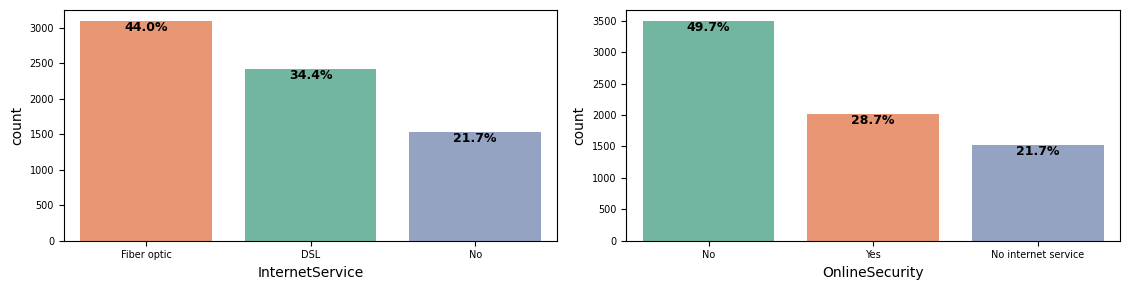

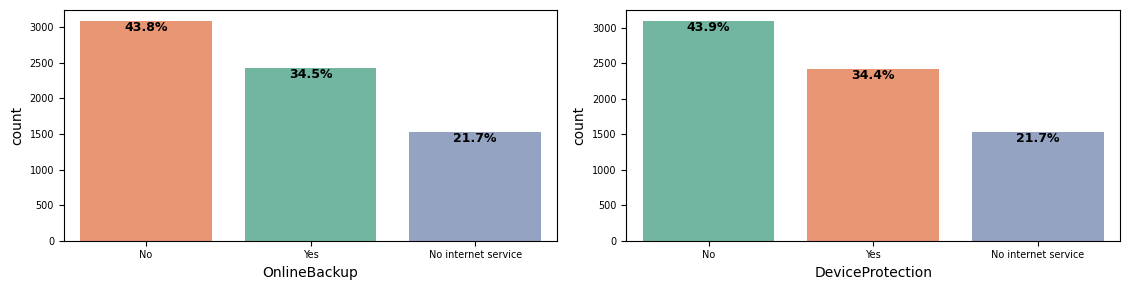

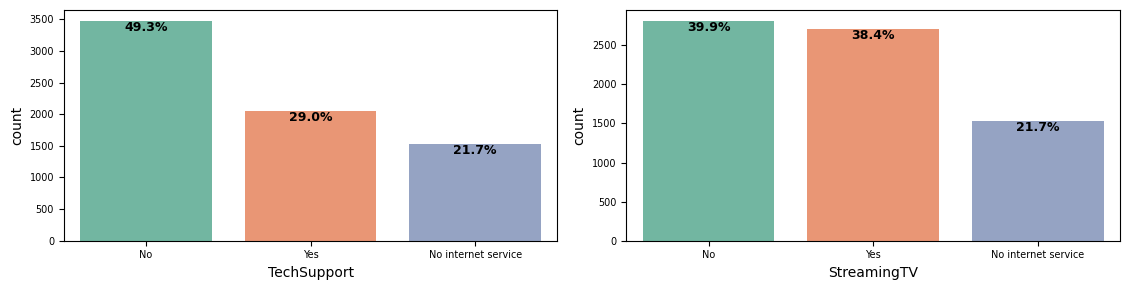

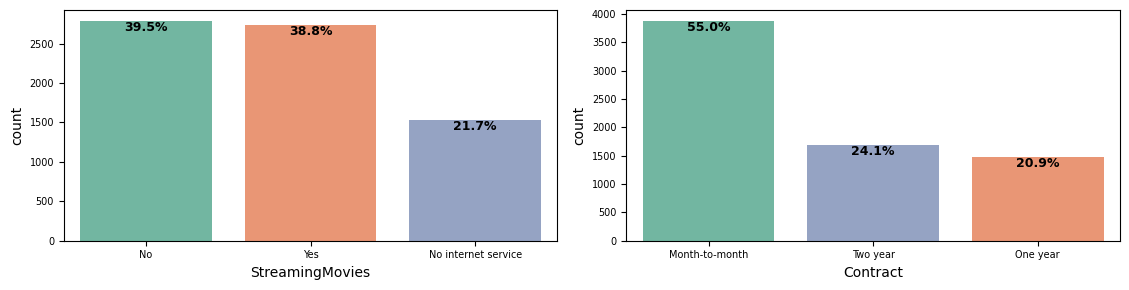

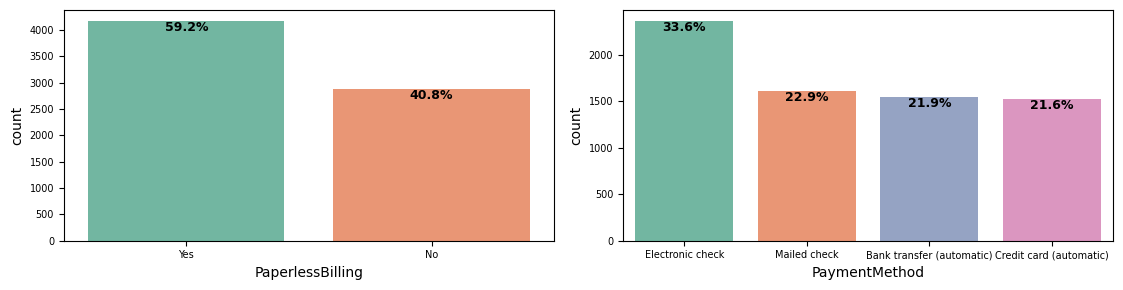

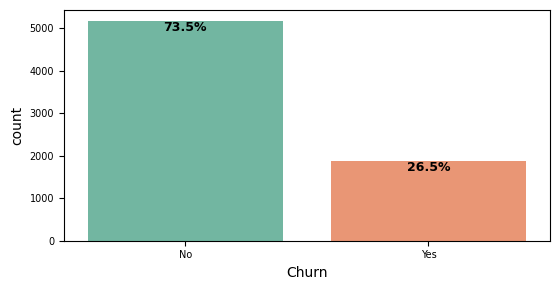

In [19]:
for i in range(0, len(cat_cols), 2):
    cols_to_plot = cat_cols[i:i+2]
    n = len(cols_to_plot)
    fig, axes = plt.subplots(1, n, figsize=(5.7 * n, 3))

    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, cols_to_plot):
        total = len(tel[col]) 
        order = tel[col].value_counts().index

        sns.countplot(data=tel, x=col, hue=col, order=order, ax=ax, palette="Set2", legend=False)

        for p in ax.patches:
            count = int(p.get_height())
            percent = 100 * count / total
            ax.annotate(f'{percent:.1f}%', 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='top', fontsize=9, color='black', fontweight='bold')

        ax.tick_params(axis='x', labelsize=7)
        ax.tick_params(axis='y', labelsize=7)

    plt.tight_layout()
    plt.show()


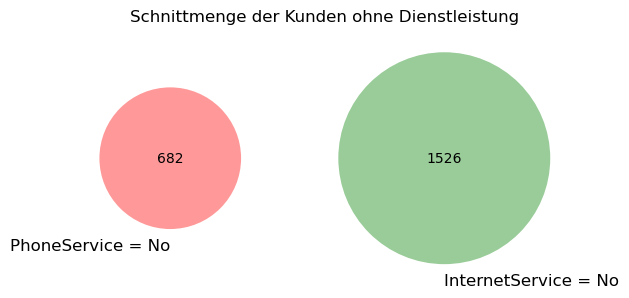

In [20]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

set_phone = set(tel[tel["PhoneService"] == "No"]["customerID"])
set_internet = set(tel[tel["InternetService"] == "No"]["customerID"])

venn2([set_phone, set_internet], set_labels=("PhoneService = No", "InternetService = No"))
plt.title("Schnittmenge der Kunden ohne Dienstleistung")
plt.show()


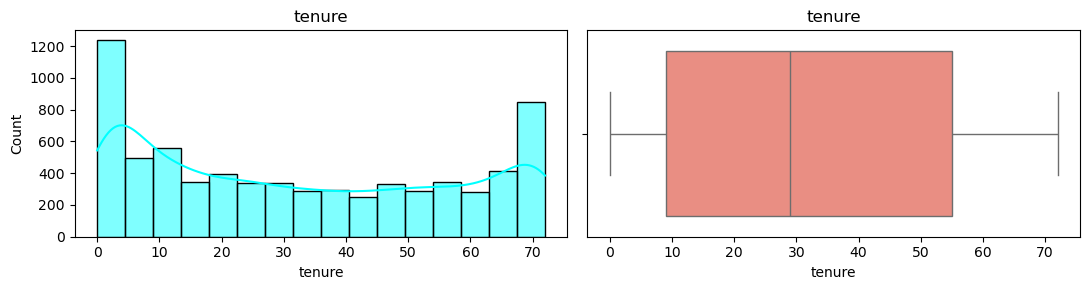

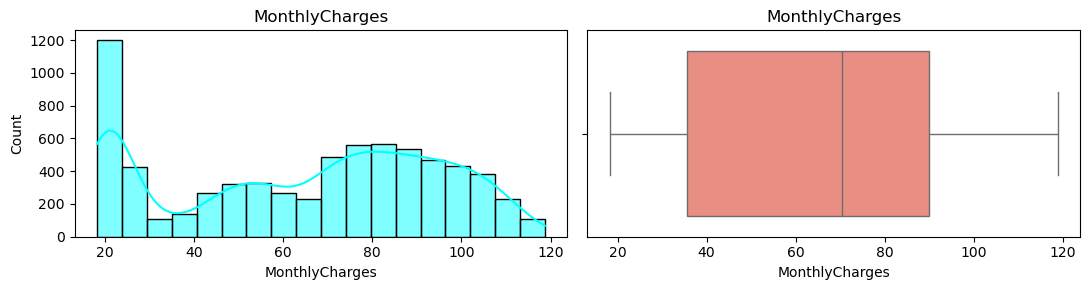

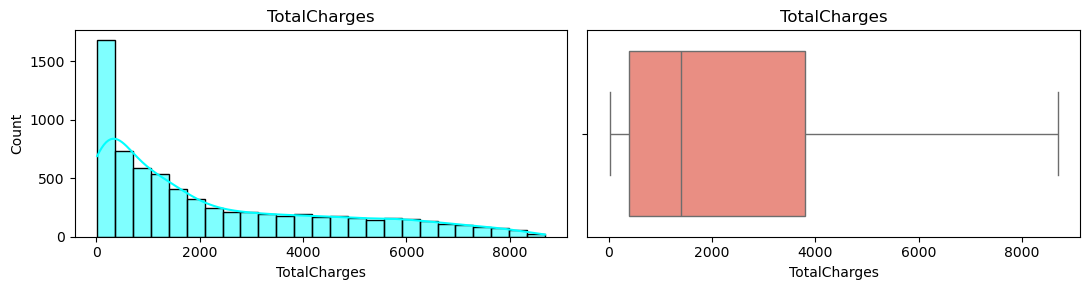

In [21]:
for col in num_cols:
    plt.figure(figsize=(11, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(tel[col], kde=True, color="cyan")
    plt.title(f"{col}")
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=tel[col], color="salmon")
    plt.title(f"{col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [22]:
tel[tel["tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,NaN,No


In [23]:
tel.groupby("Churn")[num_cols].mean().T

Churn,No,Yes
tenure,37.570,17.979
MonthlyCharges,61.265,74.441
TotalCharges,2555.344,1531.796


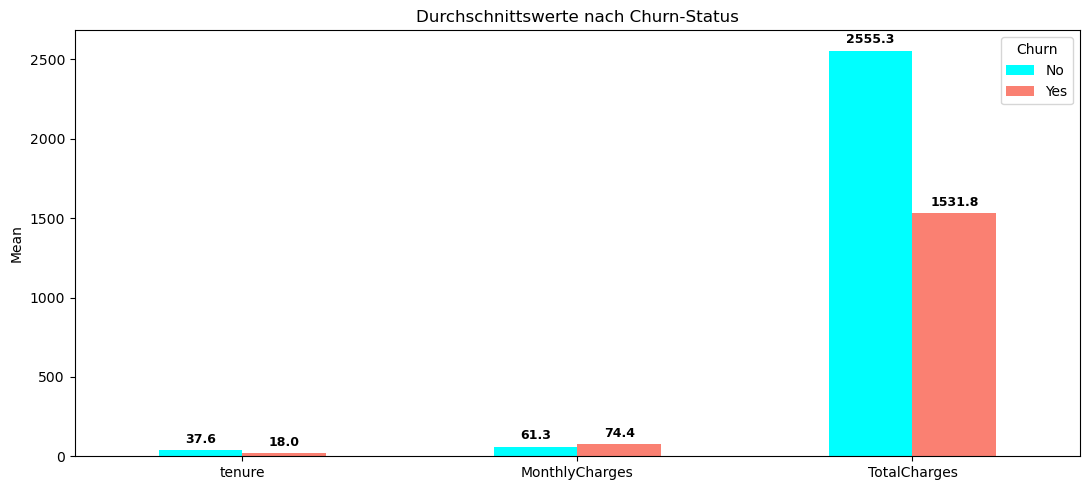

In [24]:
mean_df = tel.groupby("Churn")[num_cols].mean().T

ax = mean_df.plot(kind="bar", figsize=(11, 5), color=["cyan", "salmon"])
plt.title("Durchschnittswerte nach Churn-Status")
plt.ylabel("Mean")
plt.xticks(rotation=0)
plt.legend(title="Churn")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{height:.1f}",                        
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),                            
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


In [25]:
corr = tel[num_cols].corr()
print(corr)

                tenure  MonthlyCharges  TotalCharges
tenure           1.000           0.248         0.826
MonthlyCharges   0.248           1.000         0.651
TotalCharges     0.826           0.651         1.000


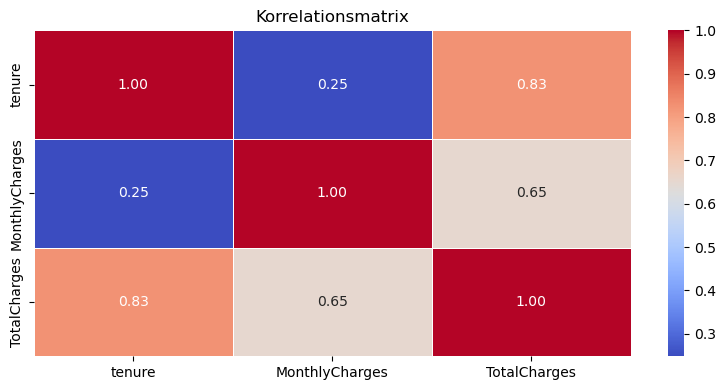

In [26]:
# Heatmap 
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korrelationsmatrix")
plt.tight_layout()
plt.show()


In [27]:
tel["Churn_Num"] = tel["Churn"].map({"Yes": 1, "No": 0})

In [28]:
for col in cat_cols:
    if col != "Churn":
        churn_rate = tel.groupby(col)["Churn_Num"].mean().sort_values(ascending=False)
        print(f"\nChurn-Raten nach der Variable {col}:\n")
        print(churn_rate)


Churn-Raten nach der Variable gender:

gender
Female   0.269
Male     0.262
Name: Churn_Num, dtype: float64

Churn-Raten nach der Variable SeniorCitizen:

SeniorCitizen
1   0.417
0   0.236
Name: Churn_Num, dtype: float64

Churn-Raten nach der Variable Partner:

Partner
No    0.330
Yes   0.197
Name: Churn_Num, dtype: float64

Churn-Raten nach der Variable Dependents:

Dependents
No    0.313
Yes   0.155
Name: Churn_Num, dtype: float64

Churn-Raten nach der Variable PhoneService:

PhoneService
Yes   0.267
No    0.249
Name: Churn_Num, dtype: float64

Churn-Raten nach der Variable MultipleLines:

MultipleLines
Yes                0.286
No                 0.250
No phone service   0.249
Name: Churn_Num, dtype: float64

Churn-Raten nach der Variable InternetService:

InternetService
Fiber optic   0.419
DSL           0.190
No            0.074
Name: Churn_Num, dtype: float64

Churn-Raten nach der Variable OnlineSecurity:

OnlineSecurity
No                    0.418
Yes                   0.146
No 

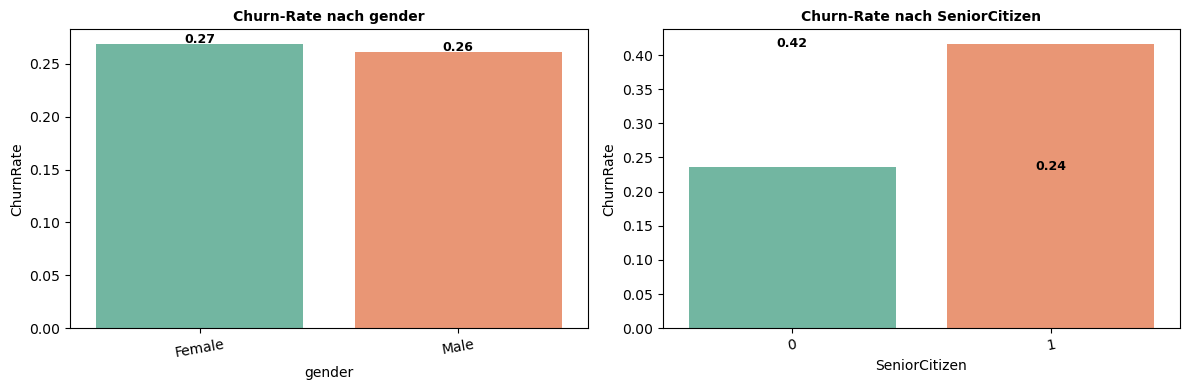

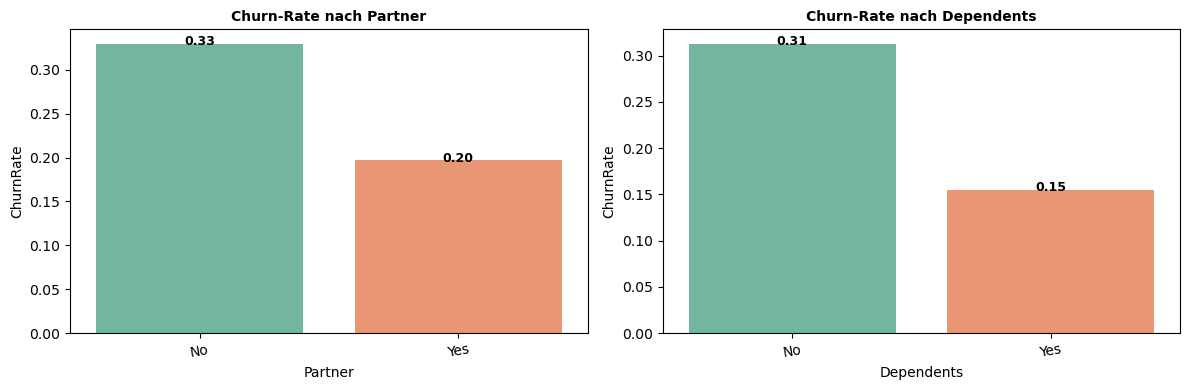

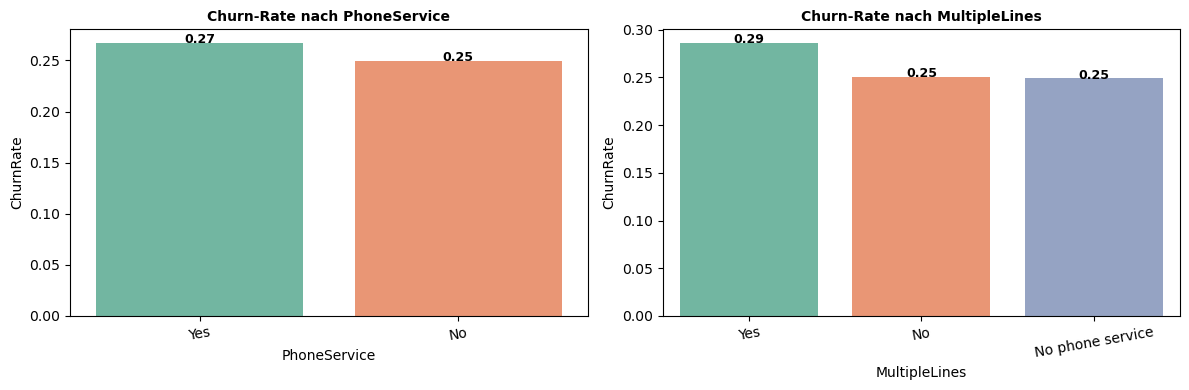

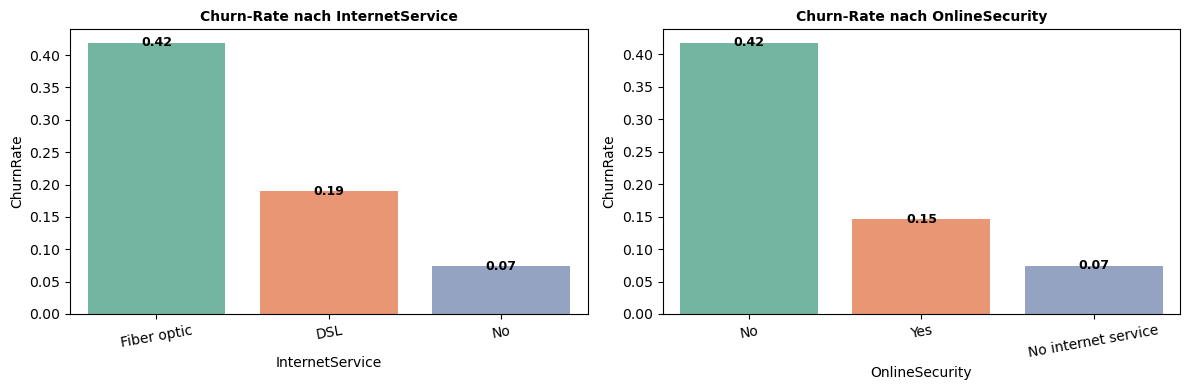

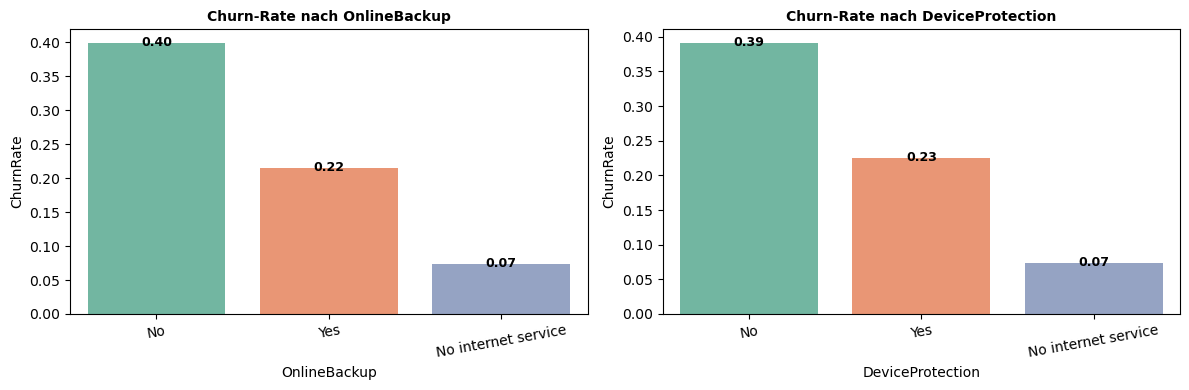

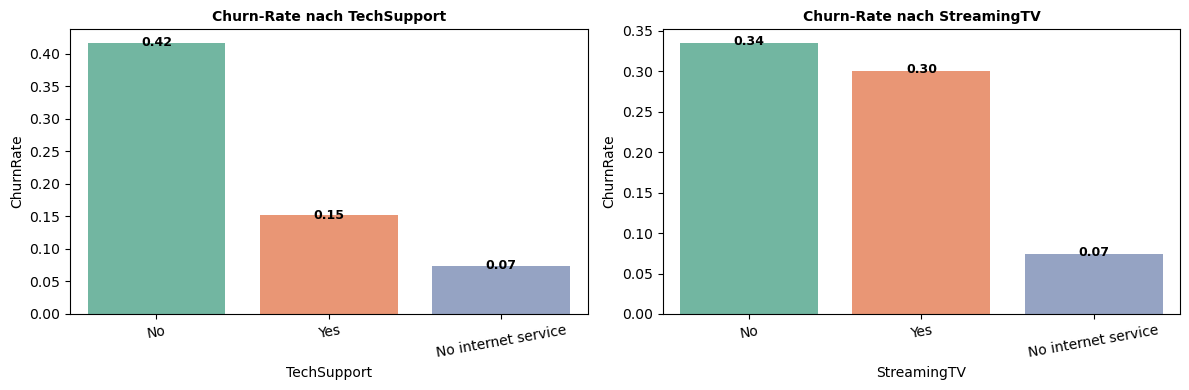

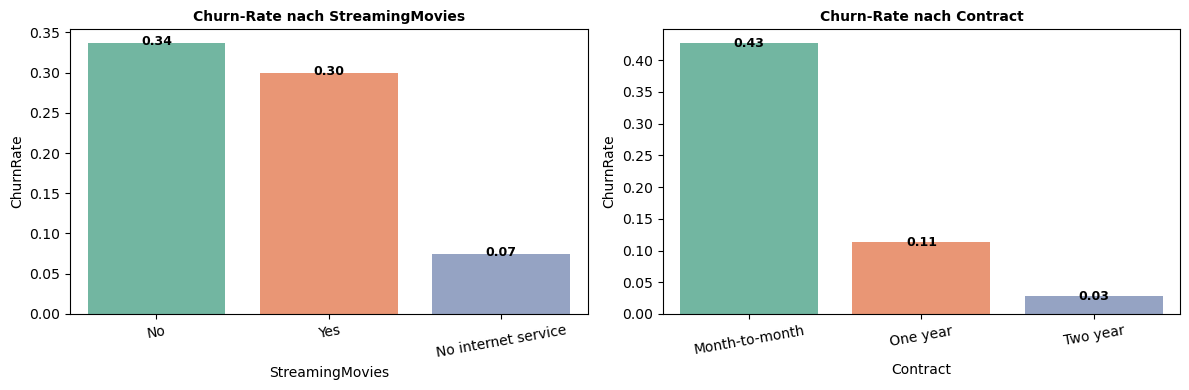

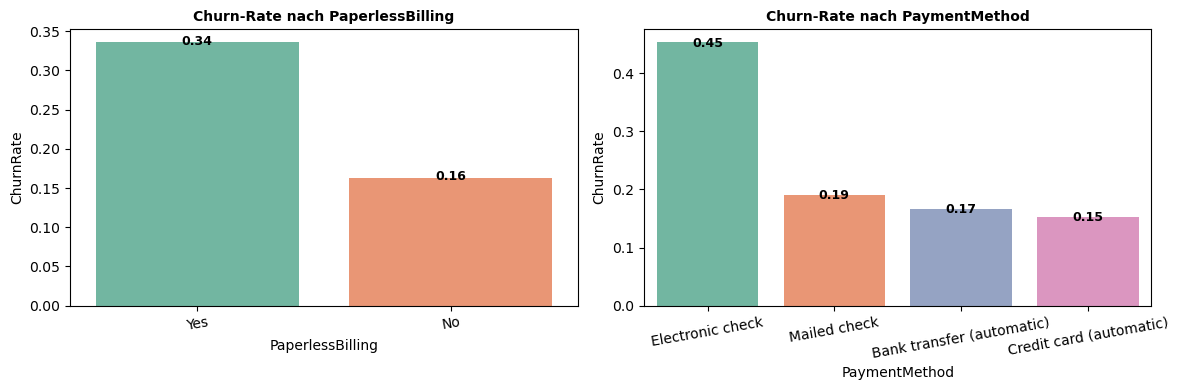

In [29]:
cat_cols_filtered = [col for col in cat_cols if col != "Churn"]
for i in range(0, len(cat_cols_filtered), 2):
    cols_to_plot = cat_cols_filtered[i:i+2]
    n = len(cols_to_plot)

    fig, axes = plt.subplots(1, n, figsize=(6 * n, 4))

    if n == 1:
        axes = [axes]  

    for ax, col in zip(axes, cols_to_plot):
        churn_rate = tel.groupby(col)["Churn_Num"].mean().sort_values(ascending=False).reset_index()
        churn_rate.columns = [col, "ChurnRate"]

        sns.barplot(data=churn_rate, x=col, y="ChurnRate", hue=col,
                    palette="Set2", dodge=False, legend=False, ax=ax)

        ax.set_title(f"Churn-Rate nach {col}", fontsize=10, fontweight="bold")
        ax.set_xlabel(col)
        ax.tick_params(axis='x', labelrotation=10)

        for i, v in enumerate(churn_rate["ChurnRate"]):
            ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='top', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()


    # Identifikation fehlender Beobachtungen

In [30]:
tel.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Churn_Num            0
dtype: int64

<Axes: >

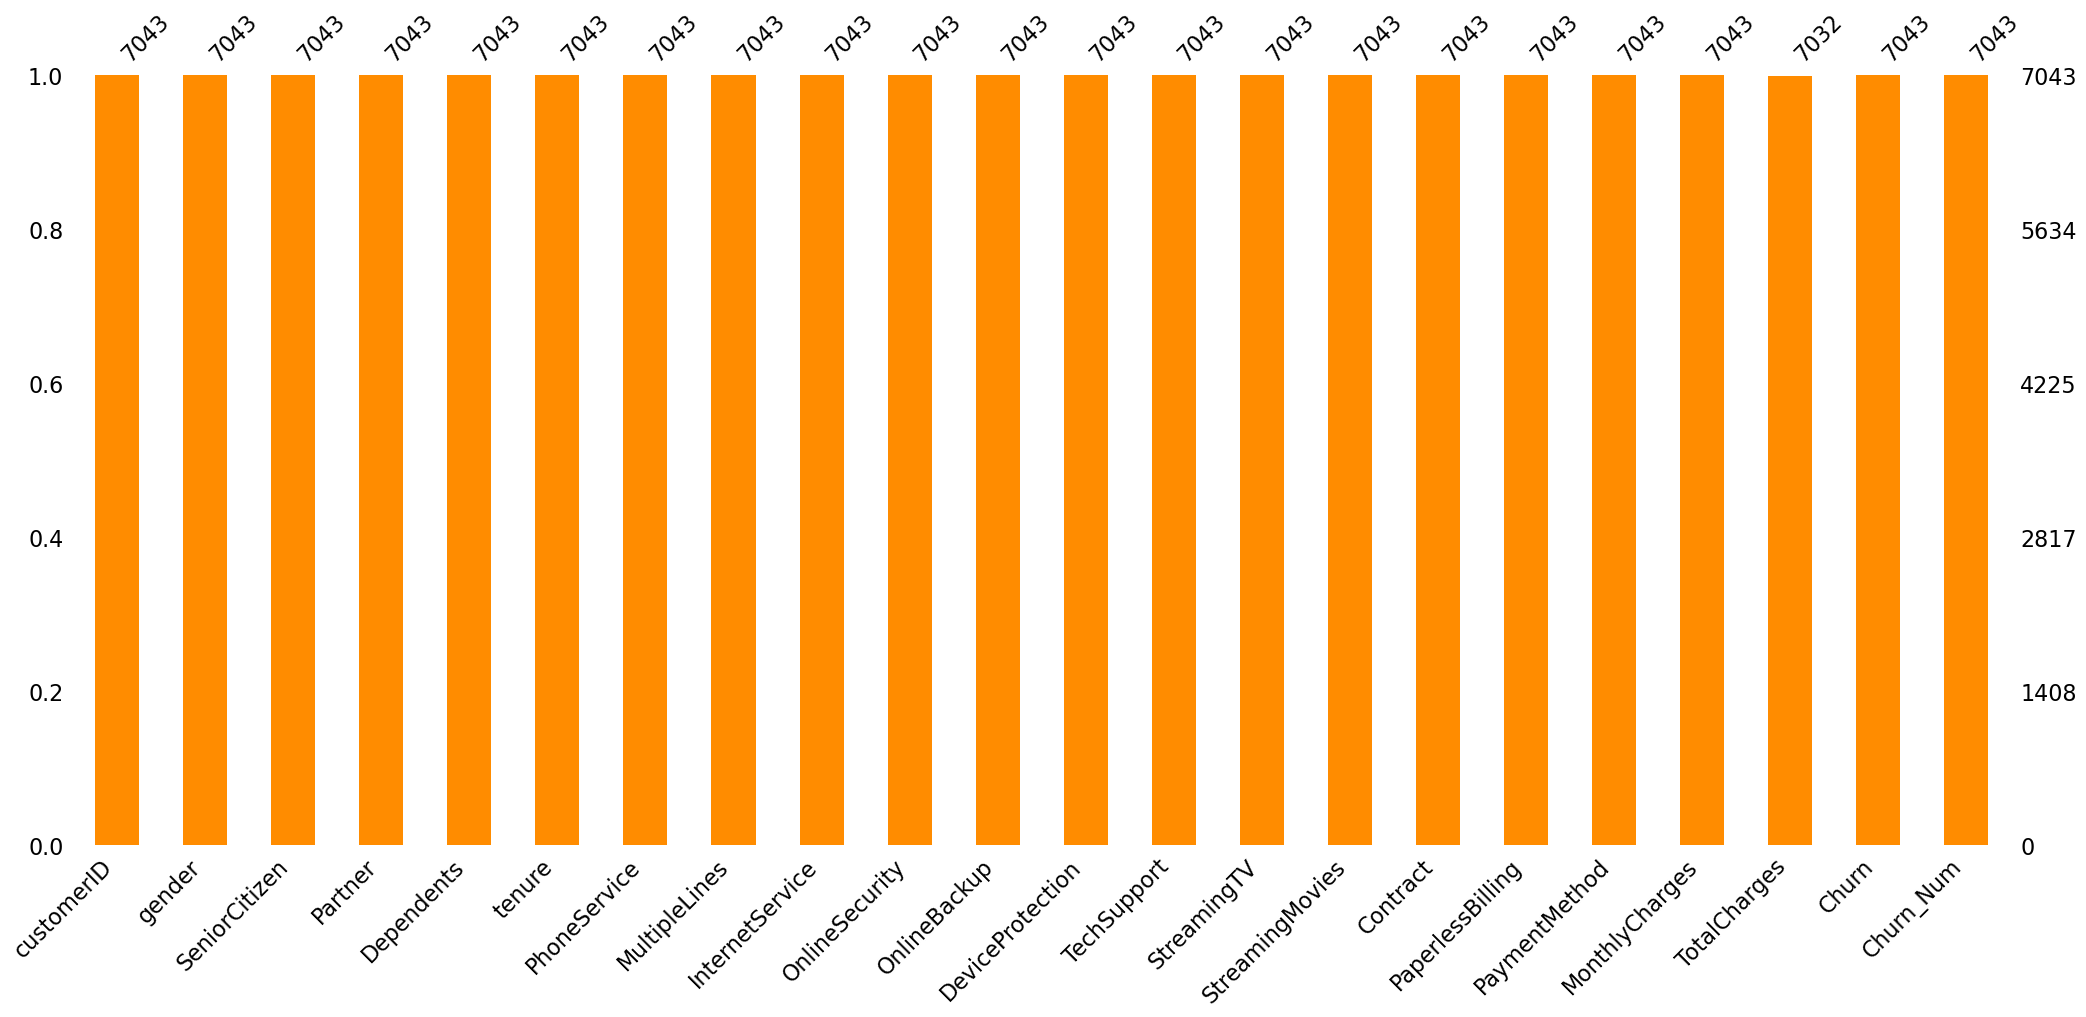

In [31]:
msno.bar(tel, color="darkorange") 

In [32]:
tel.isnull().mean()*100

customerID         0.000
gender             0.000
SeniorCitizen      0.000
Partner            0.000
Dependents         0.000
tenure             0.000
PhoneService       0.000
MultipleLines      0.000
InternetService    0.000
OnlineSecurity     0.000
OnlineBackup       0.000
DeviceProtection   0.000
TechSupport        0.000
StreamingTV        0.000
StreamingMovies    0.000
Contract           0.000
PaperlessBilling   0.000
PaymentMethod      0.000
MonthlyCharges     0.000
TotalCharges       0.156
Churn              0.000
Churn_Num          0.000
dtype: float64

    # Analyse fehlender Daten

In [33]:
tel_dropped= tel[~tel["TotalCharges"].isnull()]
tel_dropped2 = tel.dropna(subset=["TotalCharges"])


In [34]:
tel_dropped.shape

(7032, 22)

In [35]:
tel_dropped2.shape

(7032, 22)

In [36]:
tel["TotalCharges_Neu"]=tel["TotalCharges"].fillna(tel["TotalCharges"].median())  #inplace=True


In [37]:
tel["TotalCharges"] = tel.apply(
    lambda row: row["MonthlyCharges"] if pd.isna(row["TotalCharges"]) and row["tenure"] == 0
    else row["MonthlyCharges"] * row["tenure"] if pd.isna(row["TotalCharges"])
    else row["TotalCharges"],
    axis=1
)


In [38]:
tel[["TotalCharges_Neu", "TotalCharges"]].describe()

,TotalCharges_Neu,TotalCharges
count,7043.000,7043.000
mean,2281.917,2279.799
std,2265.270,2266.730
min,18.800,18.800
25%,402.225,398.550
50%,1397.475,1394.550
75%,3786.600,3786.600
max,8684.800,8684.800


    # Ausreißererkennung

In [39]:
for col in num_cols:
    Q1 = tel[col].quantile(0.25)
    Q3 = tel[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper= Q3 + 1.5 * IQR

    outlier = tel[(tel[col] < lower) | (tel[col] > upper)]

    print(f"Es gibt {len(outlier)} Ausreißer in der Variable {col}.")


Es gibt 0 Ausreißer in der Variable tenure.
Es gibt 0 Ausreißer in der Variable MonthlyCharges.
Es gibt 0 Ausreißer in der Variable TotalCharges.


        #Encoding

Da ich mich noch nicht für eine Modellierungsmethode im maschinellen Lernen entschieden habe, wurde der finale Datensatz in zwei Kopien erstellt:

* tel_L: Für die nicht ordinalen binären Merkmale (gender, partner, dependents, paperlessBilling, churn) wurde eine Label-Encoding durchgeführt.

* tel_O: Für alle Merkmale wurde eine One-Hot-Encoding durchgeführt.“

In [40]:
tel_L = tel.copy()
tel_O = tel.copy()

    # tel_L Datensatz
 * Label-Encoding wurde auf die Variablen angewendet: ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"] 
 * One Hot-Encoding wurde auf die Variablen angewendet: ["MultipleLines", "Contract"]
 * Erst mal Rare Encoding dann One Hot-Encoding wurde auf die Variablen angewendet: ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","PaymentMethod"] 

    # LabelEncoder

In [41]:
binary_cols = [col for col in tel_L.columns if tel_L[col].dtype not in ['int64', 'float64'] and tel_L[col].nunique() == 2]
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [42]:
def encoder_label(df, binary_cols):
    le = LabelEncoder()
    df[binary_cols] = le.fit_transform(df[binary_cols])
    
    original_labels = le.inverse_transform([0, 1])
    print(f"{binary_cols} 0 → {original_labels[0]}, 1 → {original_labels[1]}")
    
    return df

In [43]:
for col in binary_cols:
    encoder_label(tel_L, col)

gender 0 → Female, 1 → Male
Partner 0 → No, 1 → Yes
Dependents 0 → No, 1 → Yes
PhoneService 0 → No, 1 → Yes
PaperlessBilling 0 → No, 1 → Yes
Churn 0 → No, 1 → Yes


In [44]:
tel_L.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0,29.850
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,0,1889.500
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,1,108.150
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,0,1840.750
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,1,151.650


    # One Hot Encoding

In [45]:
stat_cols = [col for col in tel_L.columns if tel_L[col].dtype not in ['int64', 'float64'] and tel_L[col].nunique() >= 3]
stat_cols

['customerID',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [46]:
from scipy.stats import chi2_contingency

for col in stat_cols:
    if col != "customerID":
        tablo = pd.crosstab(tel_L[col], tel_L["Churn"])
        chi2, p, dof, expected = chi2_contingency(tablo)
        print(f"{col}: p-Value = {round(p, 4)}")

MultipleLines: p-Value = 0.0035
InternetService: p-Value = 0.0
OnlineSecurity: p-Value = 0.0
OnlineBackup: p-Value = 0.0
DeviceProtection: p-Value = 0.0
TechSupport: p-Value = 0.0
StreamingTV: p-Value = 0.0
StreamingMovies: p-Value = 0.0
Contract: p-Value = 0.0
PaymentMethod: p-Value = 0.0


In [47]:
pd.get_dummies(tel_L, columns=["MultipleLines", "Contract"], drop_first=True).head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,DSL,No,Yes,No,No,No,No,1,Electronic check,29.850,29.850,0,0,29.850,True,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,0,Mailed check,56.950,1889.500,0,0,1889.500,False,False,True,False
2,3668-QPYBK,1,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,1,Mailed check,53.850,108.150,1,1,108.150,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,0,Bank transfer (automatic),42.300,1840.750,0,0,1840.750,True,False,True,False
4,9237-HQITU,0,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,1,Electronic check,70.700,151.650,1,1,151.650,False,False,False,False


In [48]:
#tel_L = pd.get_dummies(tel_L, columns=["MultipleLines", "Contract"], drop_first=True)
#print(tel_L.dtypes.tail())  # anstatt 0,1 gibt es True, False


In [49]:
# One-hot coding
tel_L = pd.get_dummies(tel_L, columns=["MultipleLines", "Contract"], drop_first=True)

# Identifiziere nur die Spalten mit dem Datentyp bool und konvertiere sie in int
bool_cols = tel_L.select_dtypes("bool").columns
tel_L[bool_cols] = tel_L[bool_cols].astype(int)
tel_L.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,DSL,No,Yes,No,No,No,No,1,Electronic check,29.850,29.850,0,0,29.850,1,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,DSL,Yes,No,Yes,No,No,No,0,Mailed check,56.950,1889.500,0,0,1889.500,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,DSL,Yes,Yes,No,No,No,No,1,Mailed check,53.850,108.150,1,1,108.150,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,DSL,Yes,No,Yes,Yes,No,No,0,Bank transfer (automatic),42.300,1840.750,0,0,1840.750,1,0,1,0
4,9237-HQITU,0,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,1,Electronic check,70.700,151.650,1,1,151.650,0,0,0,0


In [50]:
#Rare Encoding

In [51]:
rare_cols = ["InternetService", "OnlineSecurity", "OnlineBackup",
             "DeviceProtection", "TechSupport", "StreamingTV",
             "StreamingMovies", "PaymentMethod"]

# Rare encoding 
def rare_encoder(dataframe, col_names, rare_perc=0.3):
    df = dataframe.copy()
    for col in col_names:
        frekans = df[col].value_counts(normalize=True)  # oranları hesapla
        rare_labels = frekans[frekans < rare_perc].index  # nadir olanları seç
        df[col] = df[col].apply(lambda x: "Rare" if x in rare_labels else x)
    return df

tel_L_rare = rare_encoder(tel_L, rare_cols, rare_perc=0.3)


In [52]:
print(tel_L[rare_cols].dtypes)


InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
PaymentMethod       object
dtype: object


In [53]:
for col in rare_cols:
    print(f"{col} value ratios:")
    print(tel_L_rare[col].value_counts(normalize=True))
    print("-" *40)


InternetService value ratios:
InternetService
Fiber optic   0.440
DSL           0.344
Rare          0.217
Name: proportion, dtype: float64
----------------------------------------
OnlineSecurity value ratios:
OnlineSecurity
Rare   0.503
No     0.497
Name: proportion, dtype: float64
----------------------------------------
OnlineBackup value ratios:
OnlineBackup
No     0.438
Yes    0.345
Rare   0.217
Name: proportion, dtype: float64
----------------------------------------
DeviceProtection value ratios:
DeviceProtection
No     0.439
Yes    0.344
Rare   0.217
Name: proportion, dtype: float64
----------------------------------------
TechSupport value ratios:
TechSupport
Rare   0.507
No     0.493
Name: proportion, dtype: float64
----------------------------------------
StreamingTV value ratios:
StreamingTV
No     0.399
Yes    0.384
Rare   0.217
Name: proportion, dtype: float64
----------------------------------------
StreamingMovies value ratios:
StreamingMovies
No     0.395
Yes    0.388
R

In [54]:
tel_L_rare.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,DSL,No,Yes,No,No,No,No,1,Electronic check,29.850,29.850,0,0,29.850,1,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,DSL,Rare,No,Yes,No,No,No,0,Rare,56.950,1889.500,0,0,1889.500,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,DSL,Rare,Yes,No,No,No,No,1,Rare,53.850,108.150,1,1,108.150,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,DSL,Rare,No,Yes,Rare,No,No,0,Rare,42.300,1840.750,0,0,1840.750,1,0,1,0
4,9237-HQITU,0,0,0,0,2,1,Fiber optic,No,No,No,No,No,No,1,Electronic check,70.700,151.650,1,1,151.650,0,0,0,0


In [55]:
# Datensatz kopieren
tel_encoded = tel_L_rare.copy()

# One-hot encoding
tel_encoded = pd.get_dummies(tel_encoded, columns=rare_cols, drop_first=True) 

# Boolean Werte in 0 und 1 konvertieren
bool_cols = tel_encoded.select_dtypes("bool").columns
tel_encoded[bool_cols] = tel_encoded[bool_cols].astype(int)


In [56]:
tel_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_Rare,OnlineSecurity_Rare,OnlineBackup_Rare,OnlineBackup_Yes,DeviceProtection_Rare,DeviceProtection_Yes,TechSupport_Rare,StreamingTV_Rare,StreamingTV_Yes,StreamingMovies_Rare,StreamingMovies_Yes,PaymentMethod_Rare
0,7590-VHVEG,0,0,1,0,1,0,1,29.850,29.850,0,0,29.850,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.950,1889.500,0,0,1889.500,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.850,108.150,1,1,108.150,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.750,0,0,1840.750,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
4,9237-HQITU,0,0,0,0,2,1,1,70.700,151.650,1,1,151.650,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


    # tel_O

In [57]:
# Kategorische Variablen auswählen (object ve bool)
cat_cols = tel_O.select_dtypes(include=["object", "bool"]).columns

# Außer'customerID'
cat_cols = [col for col in cat_cols if col != "customerID"]

# One-hot encoding
tel_O_encoded = pd.get_dummies(tel_O, columns=cat_cols, drop_first=True)

# Boolean-Werte in 0 und 1 konvertieren
bool_cols = tel_O_encoded.select_dtypes("bool").columns
tel_O_encoded[bool_cols] = tel_O_encoded[bool_cols].astype(int)
tel_O_encoded.head()


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_Num,TotalCharges_Neu,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.850,29.850,0,29.850,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.950,1889.500,0,1889.500,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.850,108.150,1,108.150,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.300,1840.750,0,1840.750,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.700,151.650,1,151.650,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


# Feature Scaling (Standart Scaling, Robust Scaling, Min Max Scaling)

Um alle drei Methoden auszuprobieren und die Unterschiede zu beobachten,
erstelle ich drei Kopien des finalen Datensatzes
tel_ss= tel_encoded.copy() für Standart Scaling
tel_rs= tel_encoded.copy() für Robust Scaling
tel_mms= tel_encoded.copy() für Min Max Scaling

In [58]:
tel_ss= tel_encoded.copy() #für Standart Scaling
tel_rs= tel_encoded.copy() #für Robust Scaling
tel_mms= tel_encoded.copy() #für Min Max Scaling

In [59]:
scaling_cols= ["tenure", "MonthlyCharges", "TotalCharges", "TotalCharges_Neu"]

In [60]:
# Standart Scaler

In [61]:
ss = StandardScaler()

tel_ss[scaling_cols] = ss.fit_transform(tel_ss[scaling_cols])
tel_ss.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_Rare,OnlineSecurity_Rare,OnlineBackup_Rare,OnlineBackup_Yes,DeviceProtection_Rare,DeviceProtection_Yes,TechSupport_Rare,StreamingTV_Rare,StreamingTV_Yes,StreamingMovies_Rare,StreamingMovies_Yes,PaymentMethod_Rare
0,7590-VHVEG,0,0,1,0,-1.277,0,1,-1.160,-0.993,0,0,-0.994,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,0.066,1,0,-0.260,-0.172,0,0,-0.173,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,-1.237,1,1,-0.363,-0.958,1,1,-0.960,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,0.514,0,0,-0.747,-0.194,0,0,-0.195,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
4,9237-HQITU,0,0,0,0,-1.237,1,1,0.197,-0.939,1,1,-0.940,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# Robust Scaler

In [63]:
rs = RobustScaler()

tel_rs[scaling_cols] = rs.fit_transform(tel_rs[scaling_cols])
tel_rs.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_Rare,OnlineSecurity_Rare,OnlineBackup_Rare,OnlineBackup_Yes,DeviceProtection_Rare,DeviceProtection_Yes,TechSupport_Rare,StreamingTV_Rare,StreamingTV_Yes,StreamingMovies_Rare,StreamingMovies_Yes,PaymentMethod_Rare
0,7590-VHVEG,0,0,1,0,-0.609,0,1,-0.745,-0.403,0,0,-0.404,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,0.109,1,0,-0.247,0.146,0,0,0.145,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,-0.587,1,1,-0.304,-0.380,1,1,-0.381,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,0.348,0,0,-0.516,0.132,0,0,0.131,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
4,9237-HQITU,0,0,0,0,-0.587,1,1,0.006,-0.367,1,1,-0.368,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# Min Max Scaler

In [65]:
mms = MinMaxScaler()

tel_mms[scaling_cols] = mms.fit_transform(tel_mms[scaling_cols])
tel_mms.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_Rare,OnlineSecurity_Rare,OnlineBackup_Rare,OnlineBackup_Yes,DeviceProtection_Rare,DeviceProtection_Yes,TechSupport_Rare,StreamingTV_Rare,StreamingTV_Yes,StreamingMovies_Rare,StreamingMovies_Yes,PaymentMethod_Rare
0,7590-VHVEG,0,0,1,0,0.014,0,1,0.115,0.001,0,0,0.001,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,0.472,1,0,0.385,0.216,0,0,0.216,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,0.028,1,1,0.354,0.010,1,1,0.010,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,0.625,0,0,0.239,0.210,0,0,0.210,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
4,9237-HQITU,0,0,0,0,0.028,1,1,0.522,0.015,1,1,0.015,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


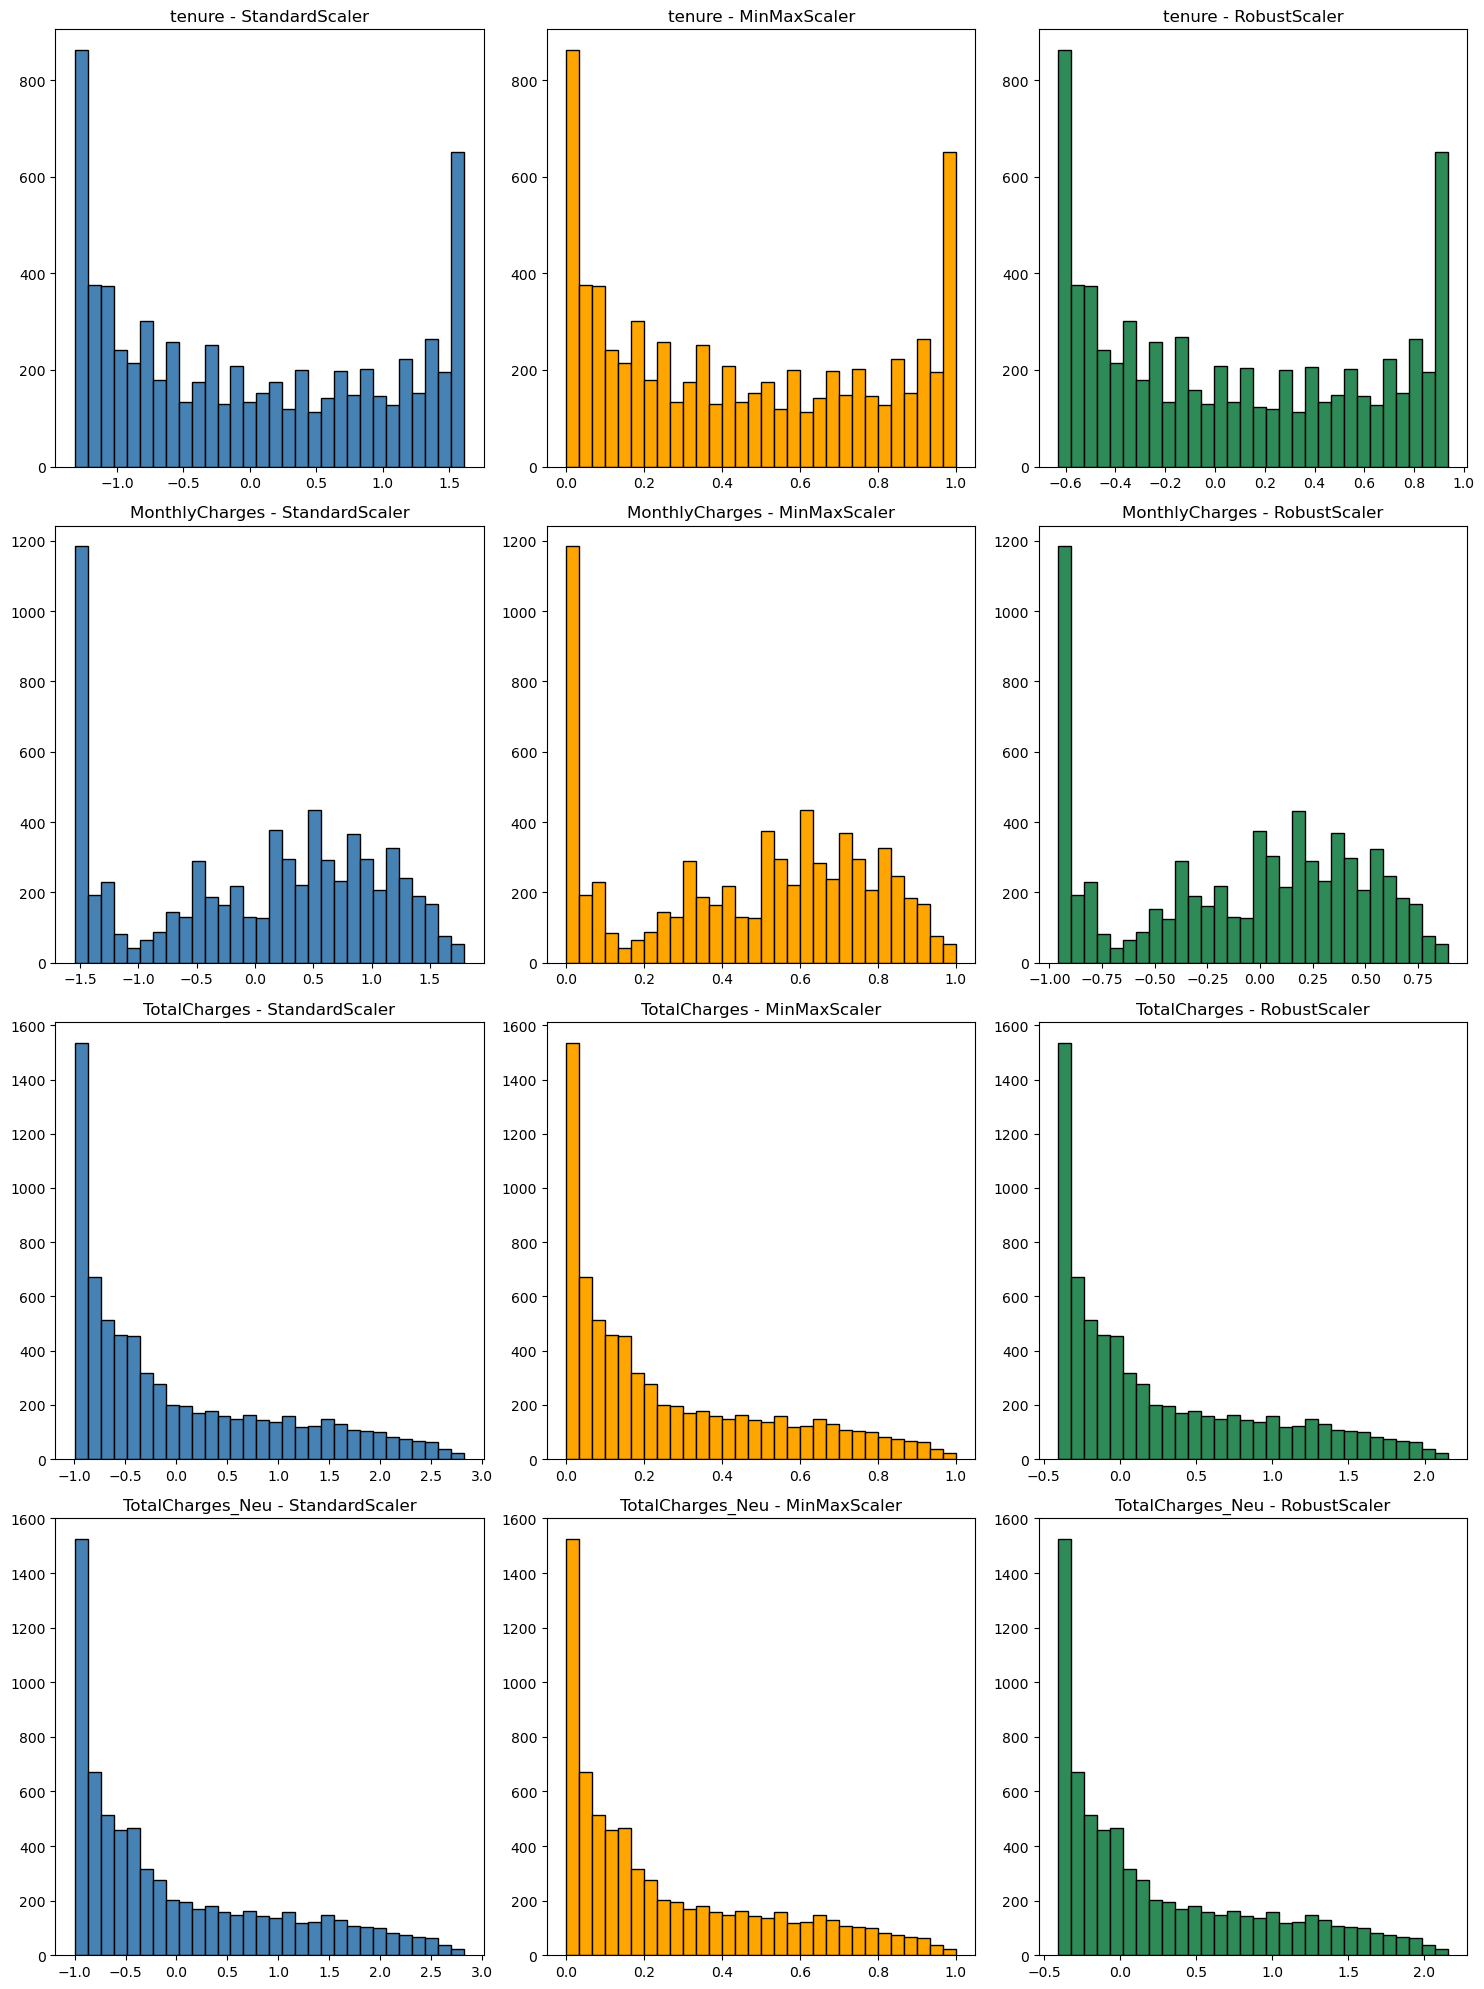

In [66]:
scaling_cols= ["tenure", "MonthlyCharges", "TotalCharges", "TotalCharges_Neu"]
# Farben
scaler_colors = {
    'StandardScaler': 'steelblue',
    'MinMaxScaler': 'orange',
    'RobustScaler': 'seagreen'
}

# Scaler
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

fig, axes = plt.subplots(len(scaling_cols), len(scalers), figsize=(15, 5 * len(scaling_cols)))

for row_idx, col in enumerate(scaling_cols):
    for col_idx, (scaler_name, scaler) in enumerate(scalers.items()):
        scaled_data = scaler.fit_transform(tel_ss[[col]])
        axes[row_idx, col_idx].hist(scaled_data, bins=30, color=scaler_colors[scaler_name], edgecolor='black')
        axes[row_idx, col_idx].set_title(f'{col} - {scaler_name}')

plt.tight_layout()
plt.show()


In [67]:
#Numeric to Categorical

In [68]:
tel_segment= tel_encoded.copy() #für numerical to categorical
segment_cols= ["tenure", "MonthlyCharges", "TotalCharges"]

In [69]:
for col in segment_cols:
    tel_segment[col + '_Segment'] = pd.cut(
        tel_segment[col],
        bins=5,
        labels=[f'Grup_{i}' for i in range(1, 6)]
    )

In [70]:
for col in segment_cols:
    print(f"{col} Segmentbereich:")
    print(pd.cut(tel_segment[col], bins=5).value_counts(sort=False))
    print("-" * 40)

tenure Segmentbereich:
tenure
(-0.072, 14.4]    2371
(14.4, 28.8]      1126
(28.8, 43.2]       989
(43.2, 57.6]       947
(57.6, 72.0]      1610
Name: count, dtype: int64
----------------------------------------
MonthlyCharges Segmentbereich:
MonthlyCharges
(18.15, 38.35]     1797
(38.35, 58.45]     1005
(58.45, 78.55]     1367
(78.55, 98.65]     1826
(98.65, 118.75]    1048
Name: count, dtype: int64
----------------------------------------
TotalCharges Segmentbereich:
TotalCharges
(10.134, 1752.0]    3948
(1752.0, 3485.2]    1179
(3485.2, 5218.4]     866
(5218.4, 6951.6]     705
(6951.6, 8684.8]     345
Name: count, dtype: int64
----------------------------------------


C:\Users\User Laptop\AppData\Local\Temp\ipykernel_14160\394468049.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tel_segment.dropna(subset=[col]), x=col, palette=palette_choice)
C:\Users\User Laptop\AppData\Local\Temp\ipykernel_14160\394468049.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tel_segment.dropna(subset=[col]), x=col, palette=palette_choice)
C:\Users\User Laptop\AppData\Local\Temp\ipykernel_14160\394468049.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tel_segment.dropna(subset=[col]), x=col

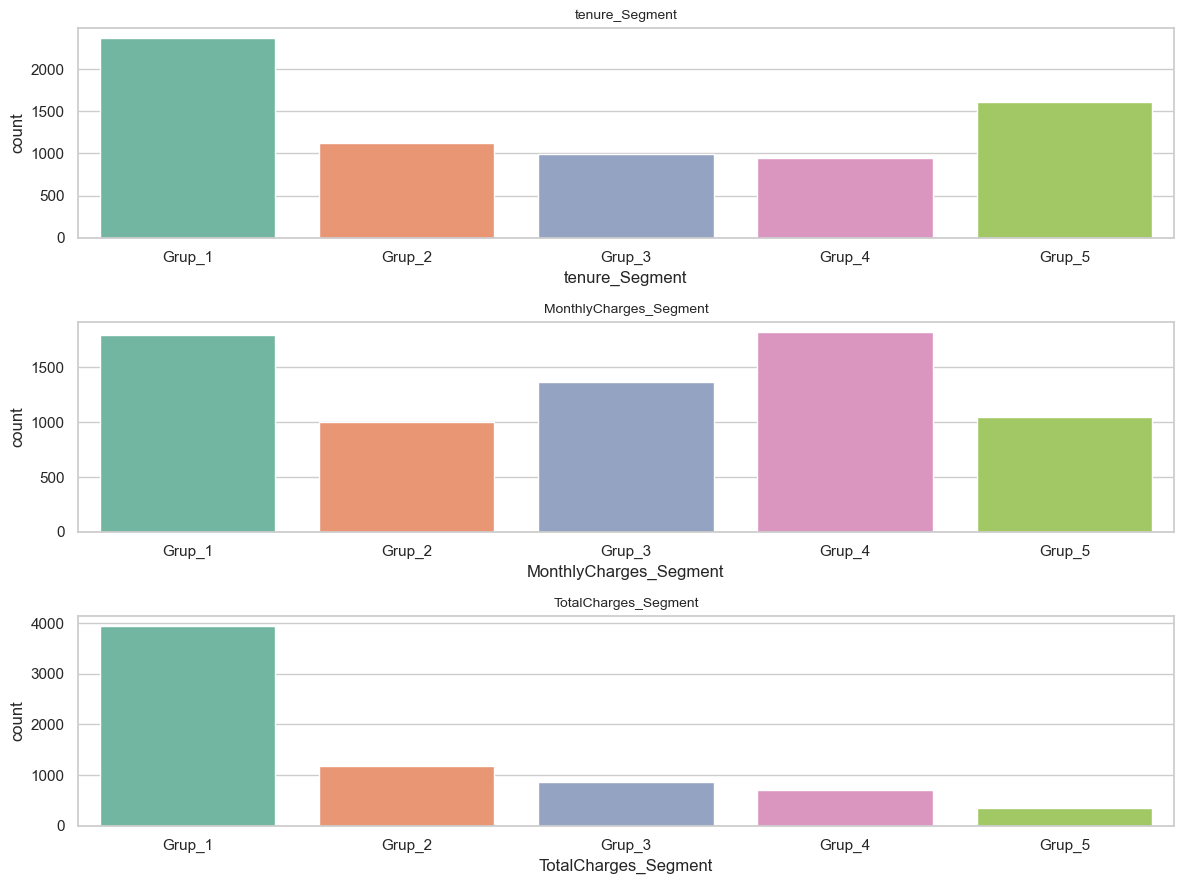

In [71]:

sns.set(style="whitegrid")

# Segment columns
for col in segment_cols:
    tel_segment[col + '_Segment'] = pd.cut(
        tel_segment[col],
        bins=5,
        labels=[f'Grup_{i}' for i in range(1, 6)]
    )

# Segment columns list
segment_plot_cols = [col + '_Segment' for col in segment_cols if col + '_Segment' in tel_segment.columns]

palette_choice = "Set2"

plt.figure(figsize=(12, 3 * len(segment_plot_cols)))

# Plot 
for i, col in enumerate(segment_plot_cols):
    plt.subplot(len(segment_plot_cols), 1, i + 1)
    sns.countplot(data=tel_segment.dropna(subset=[col]), x=col, palette=palette_choice)
    plt.title(f"{col}", fontsize=10)
    

plt.tight_layout()
plt.show()


In [72]:
#Modellierung (RandomForestClassifier)

"tel_segment", "tel_mms" Beide DataFrames wurden mit einem RandomForestClassifier modelliert. 
* Im "tel_segment" DataFrame wurden die numerischen Variablen in Segmente unterteilt und anschließend mittels Label Encoding in numerische Werte umgewandelt.
* Im "tel_mms" DataFrame wurden die numerischen Variablen durch Skalierung (Scaling) transformiert und anschließend für die Modellierung verwendet.

In [73]:
tel_segment.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_Rare,OnlineSecurity_Rare,OnlineBackup_Rare,OnlineBackup_Yes,DeviceProtection_Rare,DeviceProtection_Yes,TechSupport_Rare,StreamingTV_Rare,StreamingTV_Yes,StreamingMovies_Rare,StreamingMovies_Yes,PaymentMethod_Rare,tenure_Segment,MonthlyCharges_Segment,TotalCharges_Segment
0,7590-VHVEG,0,0,1,0,1,0,1,29.850,29.850,0,0,29.850,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Grup_1,Grup_1,Grup_1
1,5575-GNVDE,1,0,0,0,34,1,0,56.950,1889.500,0,0,1889.500,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,Grup_3,Grup_2,Grup_2
2,3668-QPYBK,1,0,0,0,2,1,1,53.850,108.150,1,1,108.150,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,Grup_1,Grup_2,Grup_1
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.750,0,0,1840.750,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,Grup_4,Grup_2,Grup_2
4,9237-HQITU,0,0,0,0,2,1,1,70.700,151.650,1,1,151.650,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Grup_1,Grup_3,Grup_1


In [74]:

# Label Encoding
label_encoder = LabelEncoder()
tel_segment['tenure_Segment_encoded'] = label_encoder.fit_transform(tel_segment['tenure_Segment'])
tel_segment['MonthlyCharges_Segment_encoded'] = label_encoder.fit_transform(tel_segment['MonthlyCharges_Segment'])
tel_segment['TotalCharges_Segment_encoded'] = label_encoder.fit_transform(tel_segment['TotalCharges_Segment'])


In [75]:
tel_segment.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_Rare,OnlineSecurity_Rare,OnlineBackup_Rare,OnlineBackup_Yes,DeviceProtection_Rare,DeviceProtection_Yes,TechSupport_Rare,StreamingTV_Rare,StreamingTV_Yes,StreamingMovies_Rare,StreamingMovies_Yes,PaymentMethod_Rare,tenure_Segment,MonthlyCharges_Segment,TotalCharges_Segment,tenure_Segment_encoded,MonthlyCharges_Segment_encoded,TotalCharges_Segment_encoded
0,7590-VHVEG,0,0,1,0,1,0,1,29.850,29.850,0,0,29.850,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Grup_1,Grup_1,Grup_1,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.950,1889.500,0,0,1889.500,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,Grup_3,Grup_2,Grup_2,2,1,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.850,108.150,1,1,108.150,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,Grup_1,Grup_2,Grup_1,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.750,0,0,1840.750,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,Grup_4,Grup_2,Grup_2,3,1,1
4,9237-HQITU,0,0,0,0,2,1,1,70.700,151.650,1,1,151.650,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Grup_1,Grup_3,Grup_1,0,2,0


In [76]:
y = tel_segment["Churn"]
X = tel_segment.drop(["customerID", "Churn", "Churn_Num", "TotalCharges_Neu", "TotalCharges", "MonthlyCharges","tenure_Segment", "MonthlyCharges_Segment", "TotalCharges_Segment"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7714150496923805

In [77]:
tel_mms.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_Num,TotalCharges_Neu,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_Rare,OnlineSecurity_Rare,OnlineBackup_Rare,OnlineBackup_Yes,DeviceProtection_Rare,DeviceProtection_Yes,TechSupport_Rare,StreamingTV_Rare,StreamingTV_Yes,StreamingMovies_Rare,StreamingMovies_Yes,PaymentMethod_Rare
0,7590-VHVEG,0,0,1,0,0.014,0,1,0.115,0.001,0,0,0.001,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,0.472,1,0,0.385,0.216,0,0,0.216,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,0.028,1,1,0.354,0.010,1,1,0.010,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,0.625,0,0,0.239,0.210,0,0,0.210,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
4,9237-HQITU,0,0,0,0,0.028,1,1,0.522,0.015,1,1,0.015,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
y = tel_mms["Churn"]
X = tel_mms.drop(["customerID", "Churn", "Churn_Num", "TotalCharges_Neu"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7889256980596309

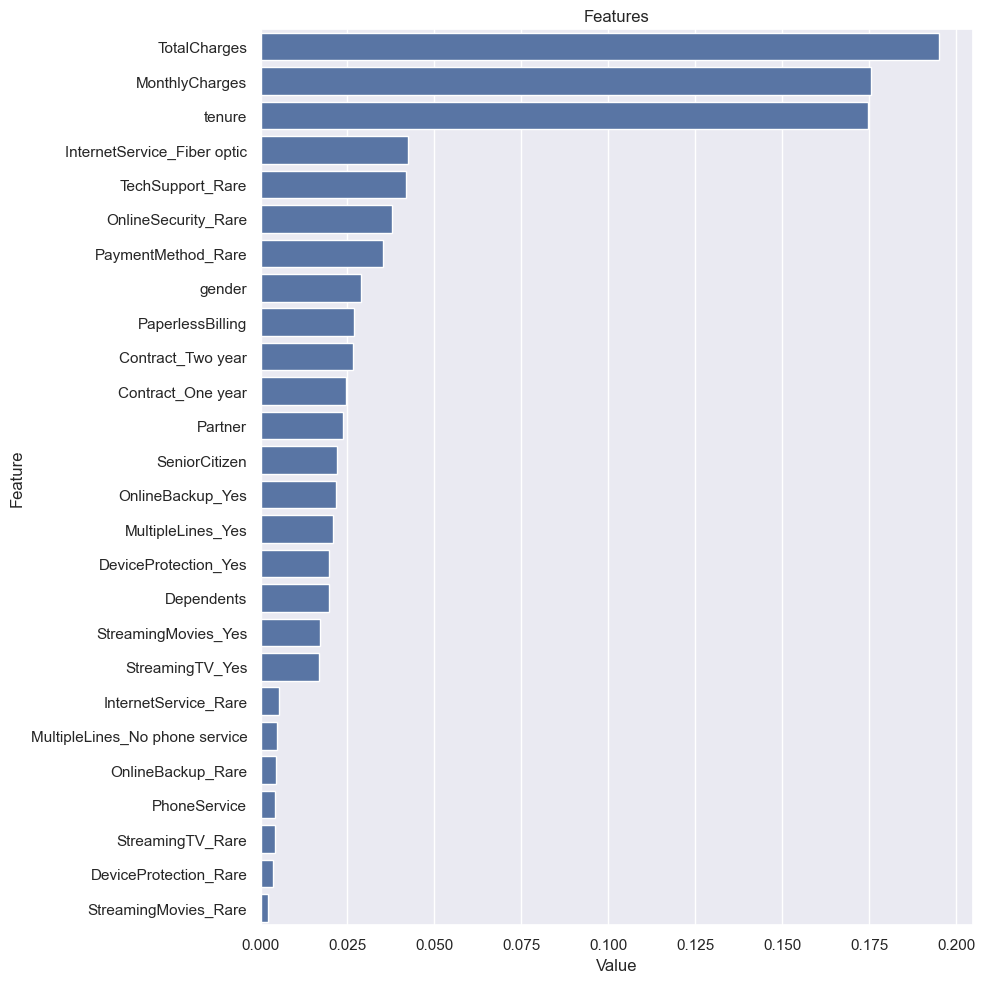

In [79]:
def importance_ploting(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


importance_ploting(rf_model, X_train)

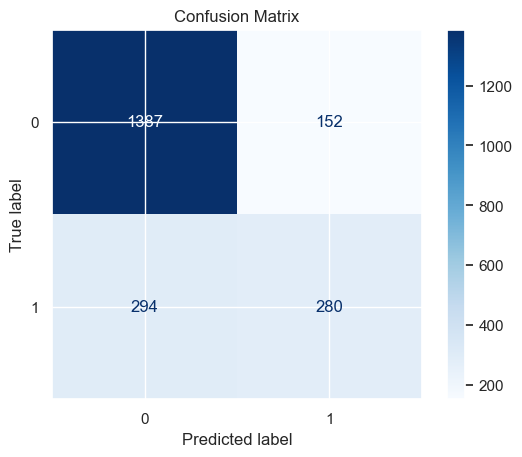

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
